# Question 3.

The effect of three different lubracating oils on fuel economy in diesel truck engines is being studied. Fuel economy is measured using brake-specific fuel consumption after the engine has been running for 15 minutes. Five different truck engines are available for the study, and the experimenters conduct the following randomized complete block design.

In [21]:
engine <- rep(1:5, each = 3)
lubricant <- c("lubricant 1", "lubricant 2", "lubricant 3")
fuel_econ <- c(0.500, 0.535, 0.513, 0.634, 0.675, 0.595, 0.487, 0.520, 0.488,
              0.329, 0.435, 0.400, 0.512, 0.540, 0.510)
df <- data.frame( engine, lubricant, fuel_econ)
df

engine,lubricant,fuel_econ
<int>,<chr>,<dbl>
1,lubricant 1,0.500
1,lubricant 2,0.535
1,lubricant 3,0.513
2,lubricant 1,0.634
2,lubricant 2,0.675
2,lubricant 3,0.595
3,lubricant 1,0.487
3,lubricant 2,0.520
3,lubricant 3,0.488


**(a)** Analyze the data from this experiment.

We can analyze the data using ANOVA.

In [22]:
model <- aov(fuel_econ ~ as.factor(lubricant) + as.factor(engine), data = df)
summary(model)

                     Df  Sum Sq  Mean Sq F value   Pr(>F)    
as.factor(lubricant)  2 0.00671 0.003353   6.353   0.0223 *  
as.factor(engine)     4 0.09210 0.023025  43.626 1.78e-05 ***
Residuals             8 0.00422 0.000528                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The anova table gives a p-value of $0.0223$, so we can conclude there is strong evidence to conclude lubraicants have differenct effects on fuel economy.

**(b)** Use the Tukey method to make comparisons among the three lubraicating oil to determine specifically which oils differ in break-specific fuel consumption.

We use the Tukey method to test the family-wise confidence levels like so

In [25]:
tukey <- TukeyHSD(x = model, 'as.factor(lubricant)', conf.level = 0.95 )
tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fuel_econ ~ as.factor(lubricant) + as.factor(engine), data = df)

$`as.factor(lubricant)`
                           diff          lwr         upr     p adj
lubricant 2-lubricant 1  0.0486  0.007082078 0.090117922 0.0245809
lubricant 3-lubricant 1  0.0088 -0.032717922 0.050317922 0.8210970
lubricant 3-lubricant 2 -0.0398 -0.081317922 0.001717922 0.0594979


Specifying $\alpha = 0.05$, we see there is a significant difference between lubricating oils $1$ and $2$.

**(c)** Analyze the residuals from this experiment and comment on model adequacy.

We can analyize the residuals using plots to see if the assumptions necessary for the model can be justified.

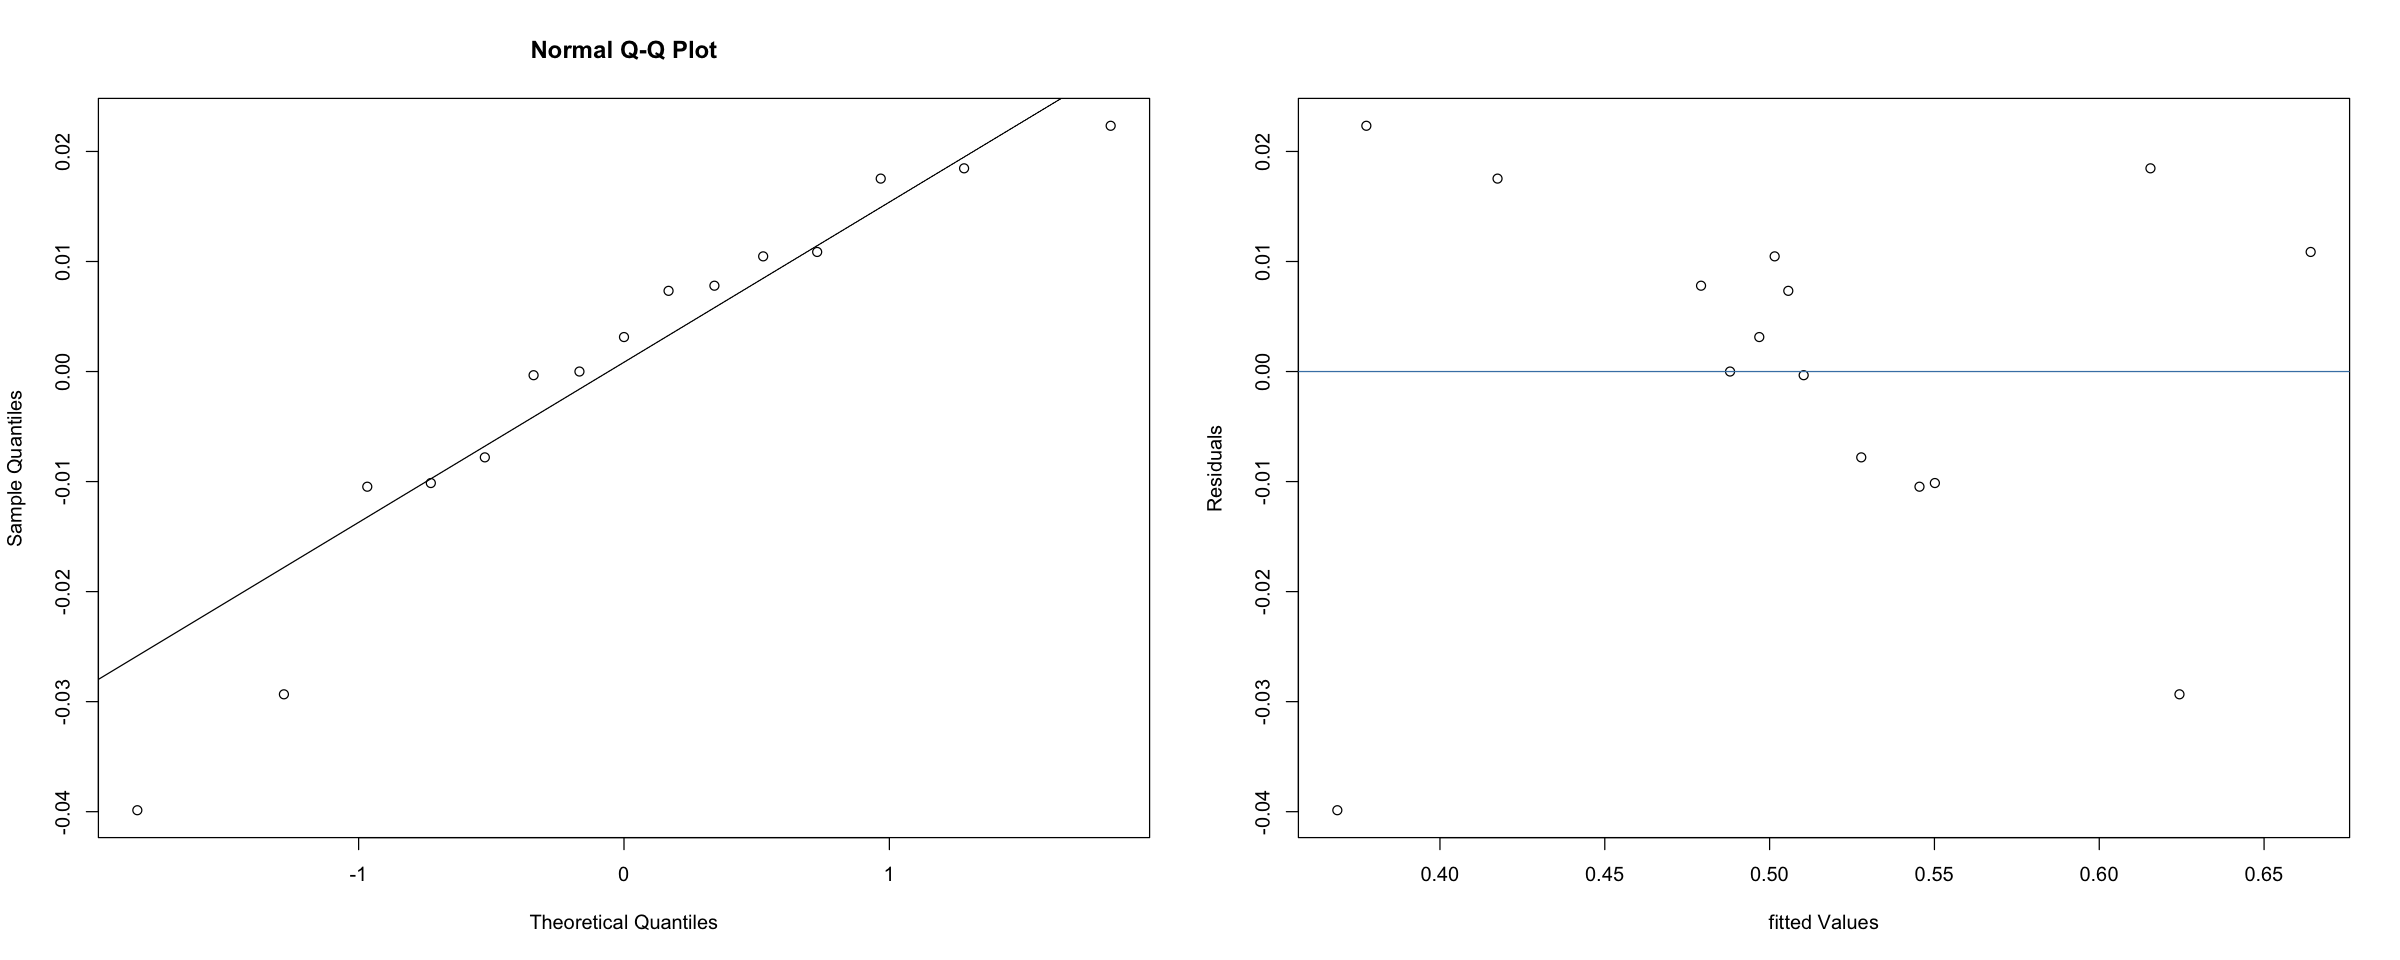

In [32]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))
# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue")

The plots do not suggest any violations to the normality of constant variance assumptions that are required.